## Predict the diameter of Asteroids

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, Normalizer, FunctionTransformer, MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
AsteroidData = pd.read_csv('.//Asteroid10.csv')
AsteroidData

F:\AutoMachine\envs\HEMA\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,full_name,a,e,i,om,w,q,ad,per_y,data_arc,...,n_del_obs_used,n_dop_obs_used,H,diameter,extent,albedo,rot_per,moid,neo,pha
0,1 Ceres,2.769165,0.076009,10.594067,80.305531,73.597695,2.558684,2.979647,4.608202,24437.0,...,405.0,0.0,3.340,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,1.594780,N,N
1,2 Pallas,2.772466,0.230337,34.836235,173.080062,310.048858,2.133865,3.411067,4.616444,71865.0,...,NaN,NaN,4.130,545,582x556x500,0.1010,7.813200,1.233240,N,N
2,3 Juno,2.669150,0.256942,12.988919,169.852755,248.138630,1.983332,3.354967,4.360814,72161.0,...,NaN,NaN,5.330,246.596,NaN,0.2140,7.210000,1.034540,N,N
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,2977.0,0.0,3.200,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,1.139480,N,N
4,5 Astraea,2.574249,0.191095,5.366988,141.576596,358.687613,2.082324,3.066174,4.130323,63097.0,...,NaN,NaN,6.850,106.699,NaN,0.2740,16.806000,1.095890,N,N
5,6 Hebe,2.425160,0.203007,14.737901,138.640204,239.807490,1.932835,2.917485,3.776755,61770.0,...,NaN,NaN,5.710,185.18,NaN,0.2679,7.274500,0.973965,N,N
6,7 Iris,2.385334,0.231206,5.523651,259.563233,145.265103,1.833831,2.936837,3.684105,61942.0,...,1.0,0.0,5.510,199.83,NaN,0.2766,7.139000,0.846100,N,N
7,8 Flora,2.201764,0.156499,5.886954,110.889330,285.287461,1.857190,2.546339,3.267115,62300.0,...,NaN,NaN,6.490,147.491,NaN,0.2260,12.865000,0.874176,N,N
8,9 Metis,2.385637,0.123114,5.576815,68.908582,6.417370,2.091931,2.679342,3.684806,61768.0,...,NaN,NaN,6.280,190,NaN,0.1180,5.079000,1.106910,N,N
9,10 Hygiea,3.141539,0.112461,3.831560,283.202166,312.315208,2.788240,3.494839,5.568291,61841.0,...,NaN,NaN,5.430,407.12,NaN,0.0717,27.630000,1.778390,N,N


In [3]:
AsteroidData.isnull().sum()

full_name              0
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     1
per_y                  1
data_arc             499
condition_code       243
n_obs_used             0
n_del_obs_used    785474
n_dop_obs_used    785474
H                   3162
diameter          646785
extent            786208
albedo            648136
rot_per           767430
moid                 302
neo                    1
pha                  302
dtype: int64

### Preprocessing Data

In [4]:
AsteroidData.shape

(786226, 22)

In [5]:
AsteroidData = AsteroidData[pd.notnull(AsteroidData['diameter'])]
AsteroidData = AsteroidData[pd.notnull(AsteroidData['albedo'])]
AsteroidData['data_arc'].fillna(1,inplace=True)

AsteroidData.isnull().sum()

full_name              0
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc               0
condition_code         0
n_obs_used             0
n_del_obs_used    137953
n_dop_obs_used    137953
H                    253
diameter               0
extent            138075
albedo                 0
rot_per           126933
moid                   0
neo                    0
pha                    0
dtype: int64

In [6]:
#'condition_code','neo','pha'
AsteroidData.drop(['full_name','extent', 'rot_per','n_del_obs_used','n_dop_obs_used'], inplace=True, axis=1)

In [7]:
AsteroidData['H'].fillna((AsteroidData['H'].mode()[0]), inplace=True)

In [8]:
AsteroidData.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
moid              0
neo               0
pha               0
dtype: int64

In [9]:
AsteroidData.neo[AsteroidData.neo == 'Y'] = 1.0
AsteroidData.neo[AsteroidData.neo == 'N'] = 0.0
AsteroidData.pha[AsteroidData.pha == 'Y'] = 1.0
AsteroidData.pha[AsteroidData.pha == 'N'] = 0.0

F:\AutoMachine\envs\HEMA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\AutoMachine\envs\HEMA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\AutoMachine\envs\HEMA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\AutoMachine\envs

In [10]:
AsteroidData['neo'] = AsteroidData['neo'].astype('int')
AsteroidData['pha'] = AsteroidData['pha'].astype('int')
AsteroidData['condition_code'] = AsteroidData['condition_code'].astype('int')
AsteroidData['diameter'] = AsteroidData['diameter'].astype('float')
#AsteroidData.drop(['condition_code','neo','pha'], inplace=True, axis=1)

#### Corelation visualization

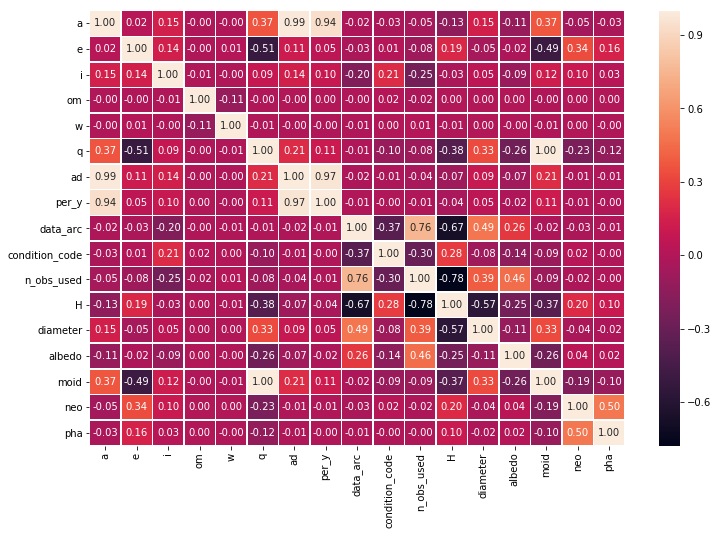

In [11]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(AsteroidData.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
#plt.savefig('Corelation.png')
plt.show()

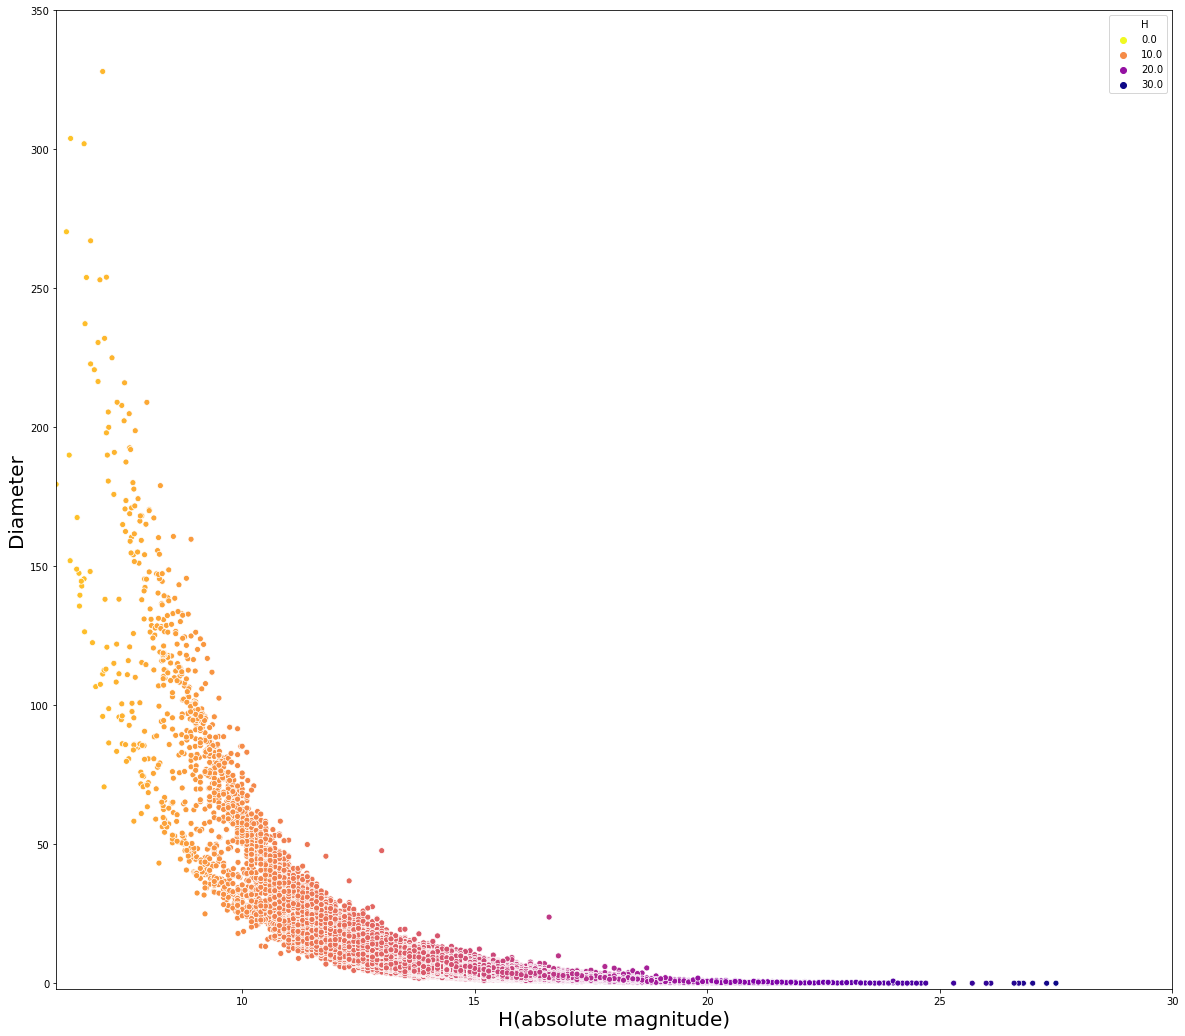

In [12]:
plt.figure(figsize=(20,18))
j = sns.scatterplot(AsteroidData['H'], AsteroidData['diameter'],hue=AsteroidData['H'], edgecolor='w',palette="plasma_r")
plt.xlabel('H(absolute magnitude)', fontsize=20)
plt.ylabel('Diameter', fontsize=20)
plt.ylim([-2, 350])
plt.xlim([6, 30])
#plt.savefig('Dia_H_1.png')
plt.show()

In [13]:
#AsteroidData.drop(['pha'], inplace=True, axis=1)

In [14]:
#f,ax = plt.subplots(figsize=(12,8))
#sns.heatmap(AsteroidData.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
#plt.show()

### X and y 

In [15]:
y = AsteroidData['diameter']
AsteroidData.drop('diameter', axis=1, inplace=True)
X = AsteroidData

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Data Visualization

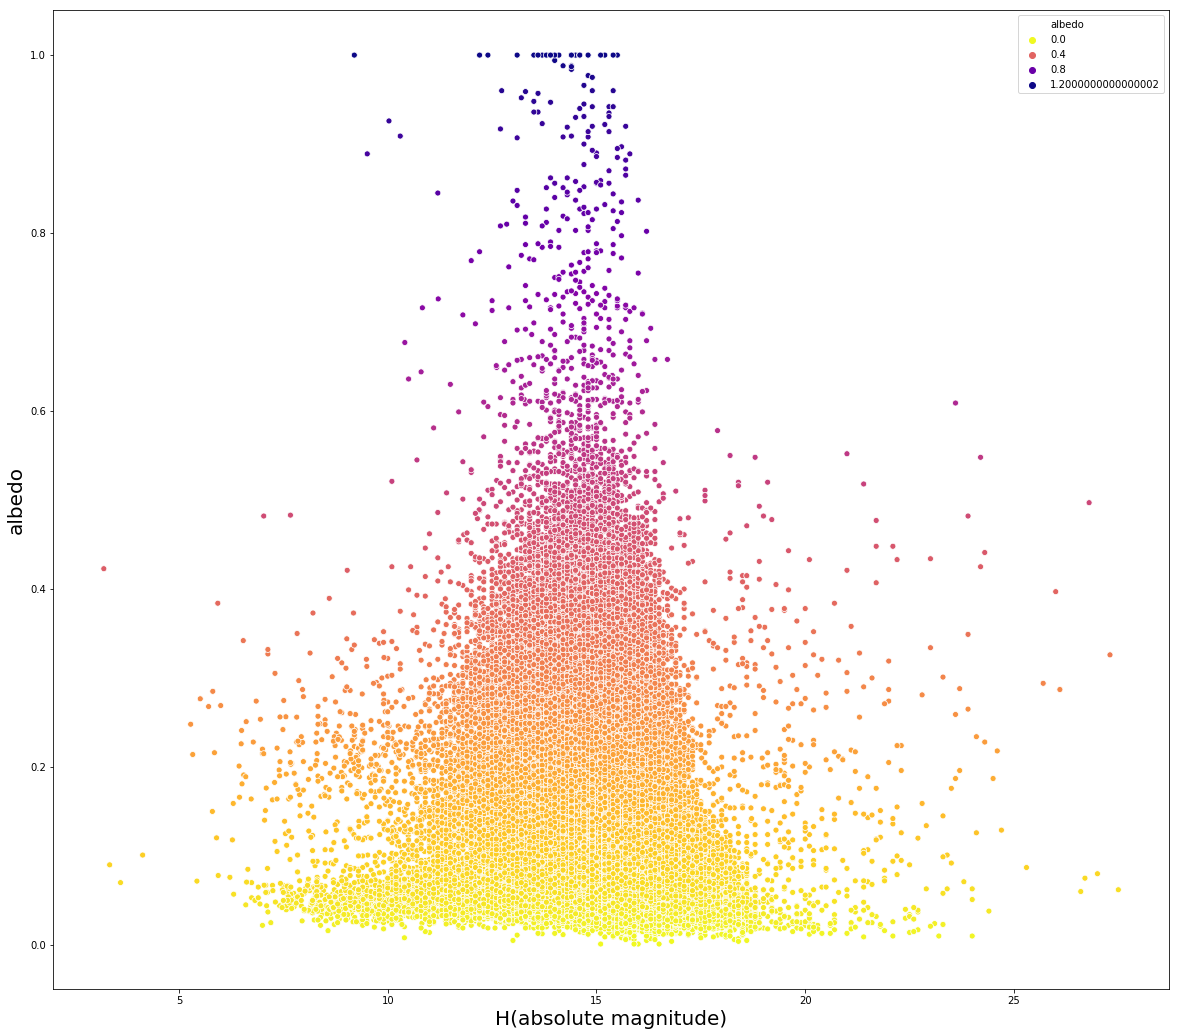

In [17]:
plt.figure(figsize=(20,18))
j = sns.scatterplot(AsteroidData['H'], AsteroidData['albedo'],hue=AsteroidData['albedo'], edgecolor='w',palette="plasma_r")
plt.xlabel('H(absolute magnitude)', fontsize=20)
plt.ylabel('albedo', fontsize=20)
#plt.savefig('Albedo_H_1.png')
plt.show()

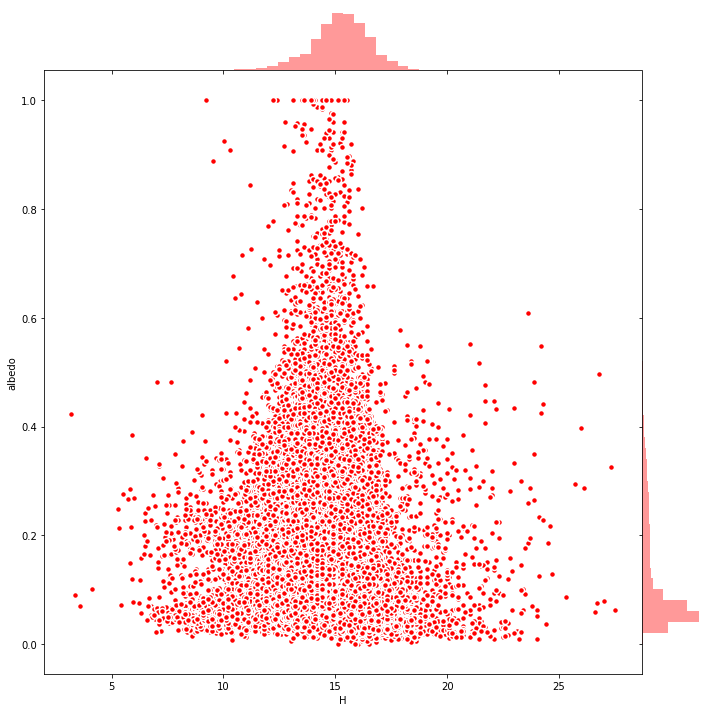

In [18]:
g = sns.jointplot("H","albedo",data=AsteroidData, height=10, ratio=10, color="red", edgecolor='w', linewidth=1.5,space=0)
#plt.savefig('Albedo_H_2.png')
plt.show()

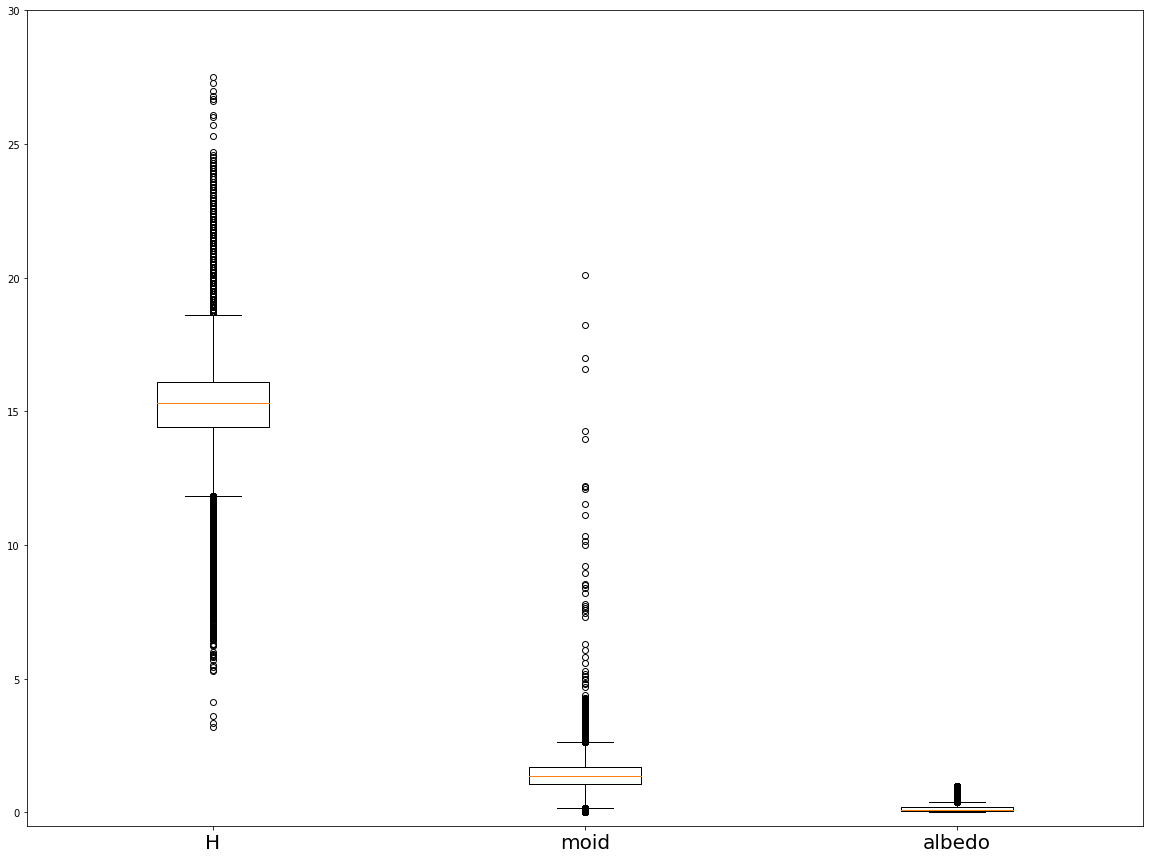

In [19]:
plt.figure(figsize=(20,15))
#fig, ax = plt.subplots()
plt.boxplot([AsteroidData['H'],AsteroidData['moid'],AsteroidData['albedo']])
plt.ylim([-0.5, 30])
plt.xticks([1, 2, 3],['H','moid', 'albedo'], fontsize=20)
#plt.savefig('BoxPlot.png')
plt.show()

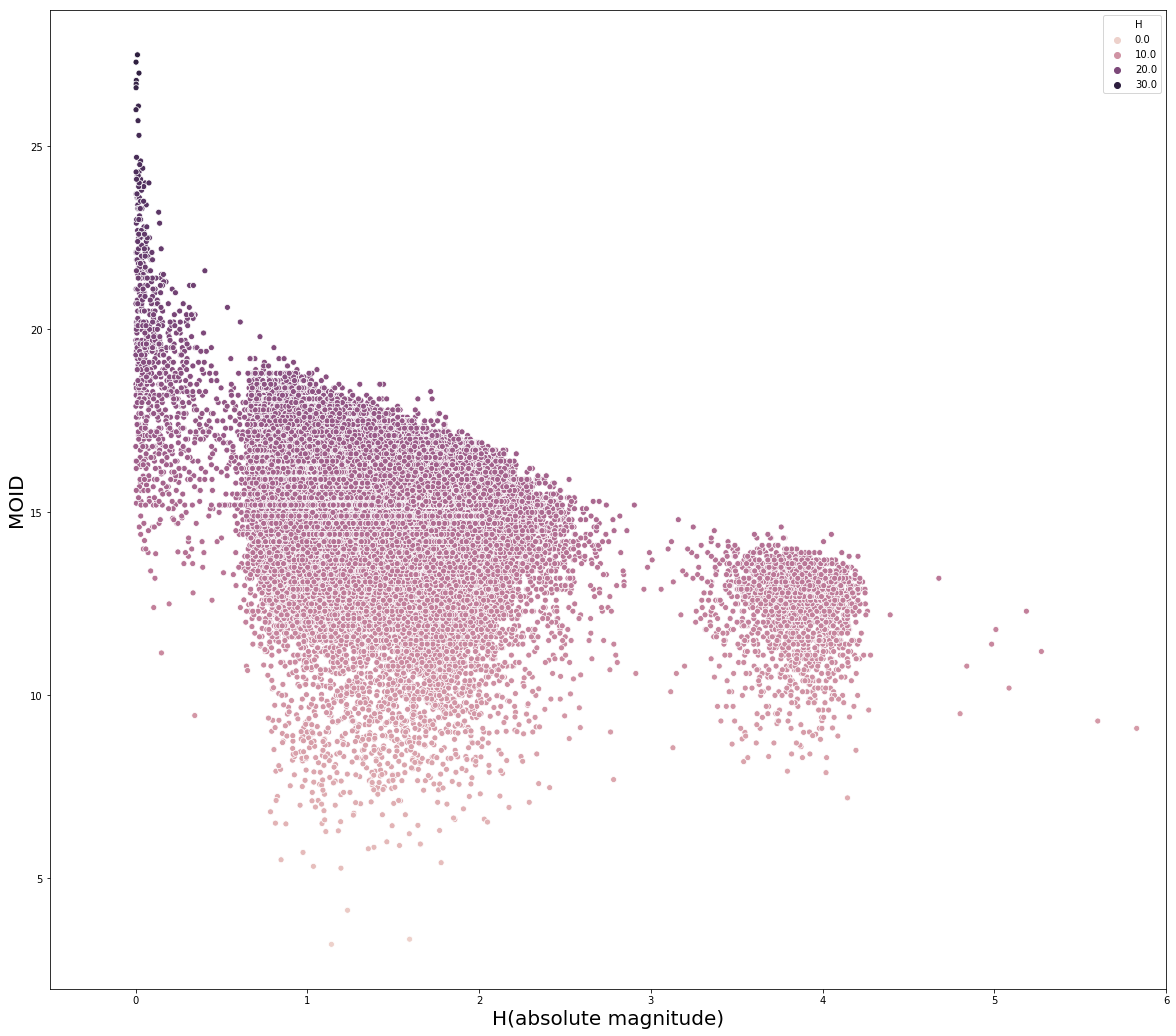

In [20]:
#sns.relplot(x="H", y="albedo", kind="line", data=AsteroidData, height=10, aspect=2)
plt.figure(figsize=(20,18))
k = sns.scatterplot(x="moid", y="H", hue="H",color="green", data=AsteroidData,)
plt.xlabel('H(absolute magnitude)', fontsize=20)
plt.xlim([-0.5, 6])
plt.ylabel('MOID', fontsize=20)
#plt.savefig('Moid_H.png')
plt.show()

In [21]:
def PreprocessData(X_train, X_test):
    scaler = MaxAbsScaler()
    #scaler = StandardScaler()
    #scaler = MinMaxScaler()
    #scaler = Normalizer()
    #scaler = FunctionTransformer(np.power,kw_args={'order':3}, validate=True )
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [22]:
def Model_(X_train,y_train,y_pred, Model):
    
    Model.fit(X_train, y_train)
    y_predict = Model.predict(X_train)
    
    MeanAbsoluteError = mean_absolute_error(y_test, y_test_predict)
    MeanSquaredError = mean_squared_error(y_test, y_test_predict)
    MedianAbsoluteError = median_absolute_error(y_test, y_test_predict)
    VarianceScore = explained_variance_score(y_test, y_test_predict)
    R2Score = r2_score(y_test, y_test_predict)
    
    return MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score, y_test_predict

## Gtradient boosting Regressor

In [26]:
Model_1 = GradientBoostingRegressor(loss='huber',max_features="auto",learning_rate=0.4,verbose=1,warm_start=True)
MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score, y_pred1 = Model_(X_train, X_test, y_train, y_test, Model_1, PreProcess=1)
print("Gradient Boosting Regressor Model: ")
print("Mean Absolute Error:\t","{:0.10f}".format(MeanAbsoluteError))
print("Mean Squared Error :\t","{:0.10f}".format(MeanSquaredError))
print("Median Absolute Error :\t","{:0.10f}".format(MedianAbsoluteError))
print("Explained Variance Score :\t","{:0.10f}".format(VarianceScore))
print("R2-Score :\t","{:0.10f}".format(R2Score))

      Iter       Train Loss   Remaining Time 
         1           5.3243           32.48s
         2           3.0332           32.92s
         3           1.9202           32.33s
         4           1.3560           30.75s
         5           1.1536           30.28s
         6           0.9837           29.62s
         7           0.7788           28.65s
         8           0.6616           28.39s
         9           0.5685           28.12s
        10           0.5476           27.56s
        20           0.3394           23.06s
        30           0.2745           21.44s
        40           0.2465           18.19s
        50           0.2303           15.84s
        60           0.2158           12.40s
        70           0.2101            9.75s
        80           0.1982            6.49s
        90           0.1899            3.31s
       100           0.1783            0.00s
Gradient Boosting Regressor Model: 
Mean Absolute Error:	 0.4607025067
Mean Squared Error :	 6.8237

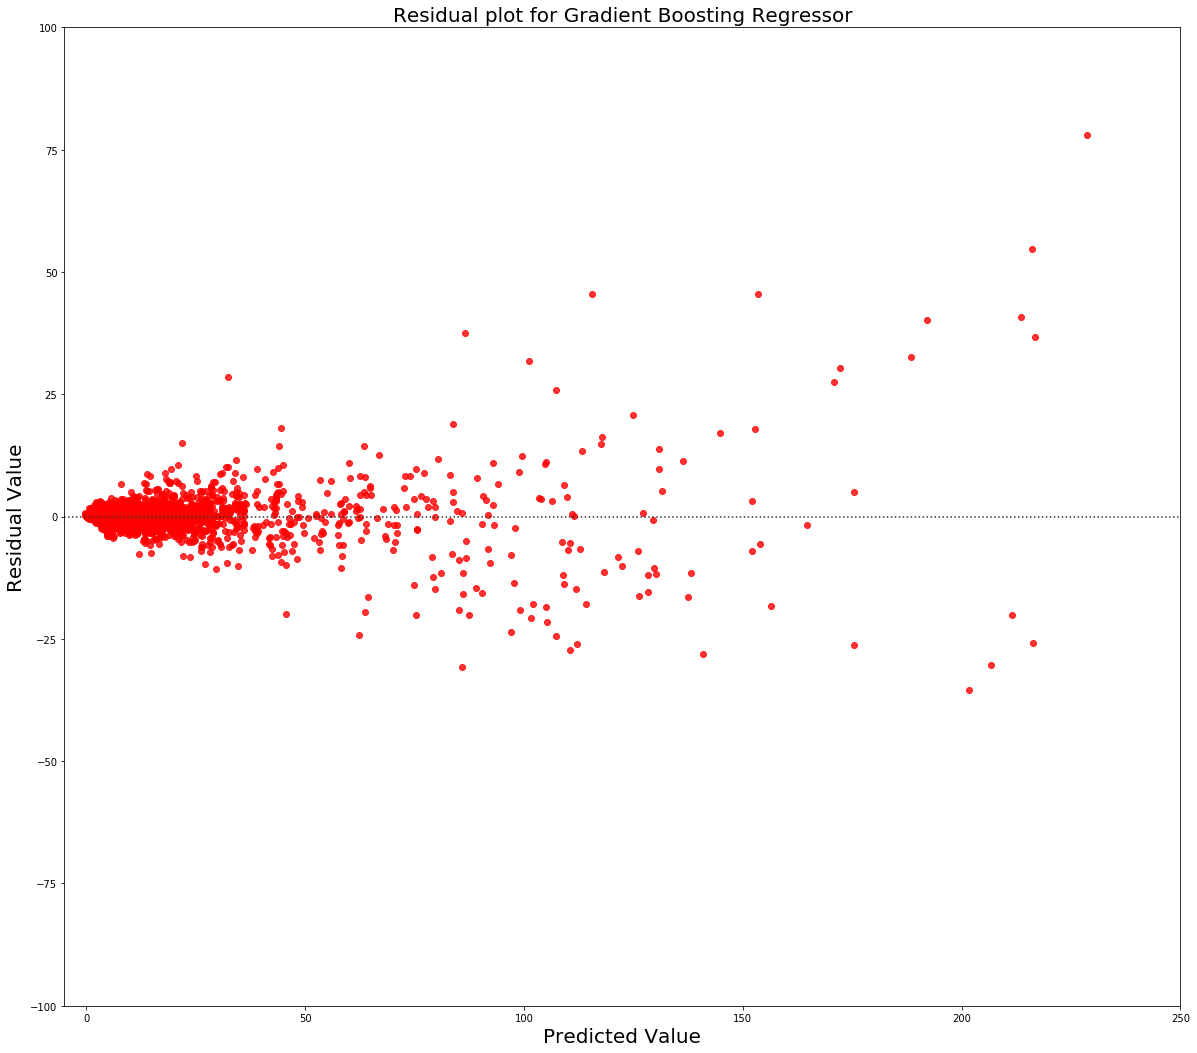

In [24]:
## Gradient Boosting Regressor
plt.figure(figsize=(20,18))
k = sns.residplot(x=y_pred1, y=(y_test-y_pred1),robust=True, color='red')#, hue=y_pred1, palette='plasma_r')
plt.title("Residual plot for Gradient Boosting Regressor", fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.ylabel('Residual Value', fontsize=20)
plt.xlim([-5, 250])
plt.ylim([-100, 100])
#plt.savefig('Gradientboost.png')
plt.show()

## XGboost Regressor

In [25]:
Model_2 = XGBRegressor(n_estimators=1000)
MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score, y_pred2 = Model_(X_train, X_test, y_train, y_test, Model_2, PreProcess=1)
print("XGboost Regressor Model: ")
print("Mean Absolute Error:\t","{:0.10f}".format(MeanAbsoluteError))
print("Mean Squared Error :\t","{:0.10f}".format(MeanSquaredError))
print("Median Absolute Error :\t","{:0.10f}".format(MedianAbsoluteError))
print("Explained Variance Score :\t","{:0.10f}".format(VarianceScore))
print("R2-Score :\t","{:0.10f}".format(R2Score))

XGboost Regressor Model: 
Mean Absolute Error:	 0.4164732536
Mean Squared Error :	 5.3267230111
Median Absolute Error :	 0.2137639141
Explained Variance Score :	 0.9472328399
R2-Score :	 0.9472327649


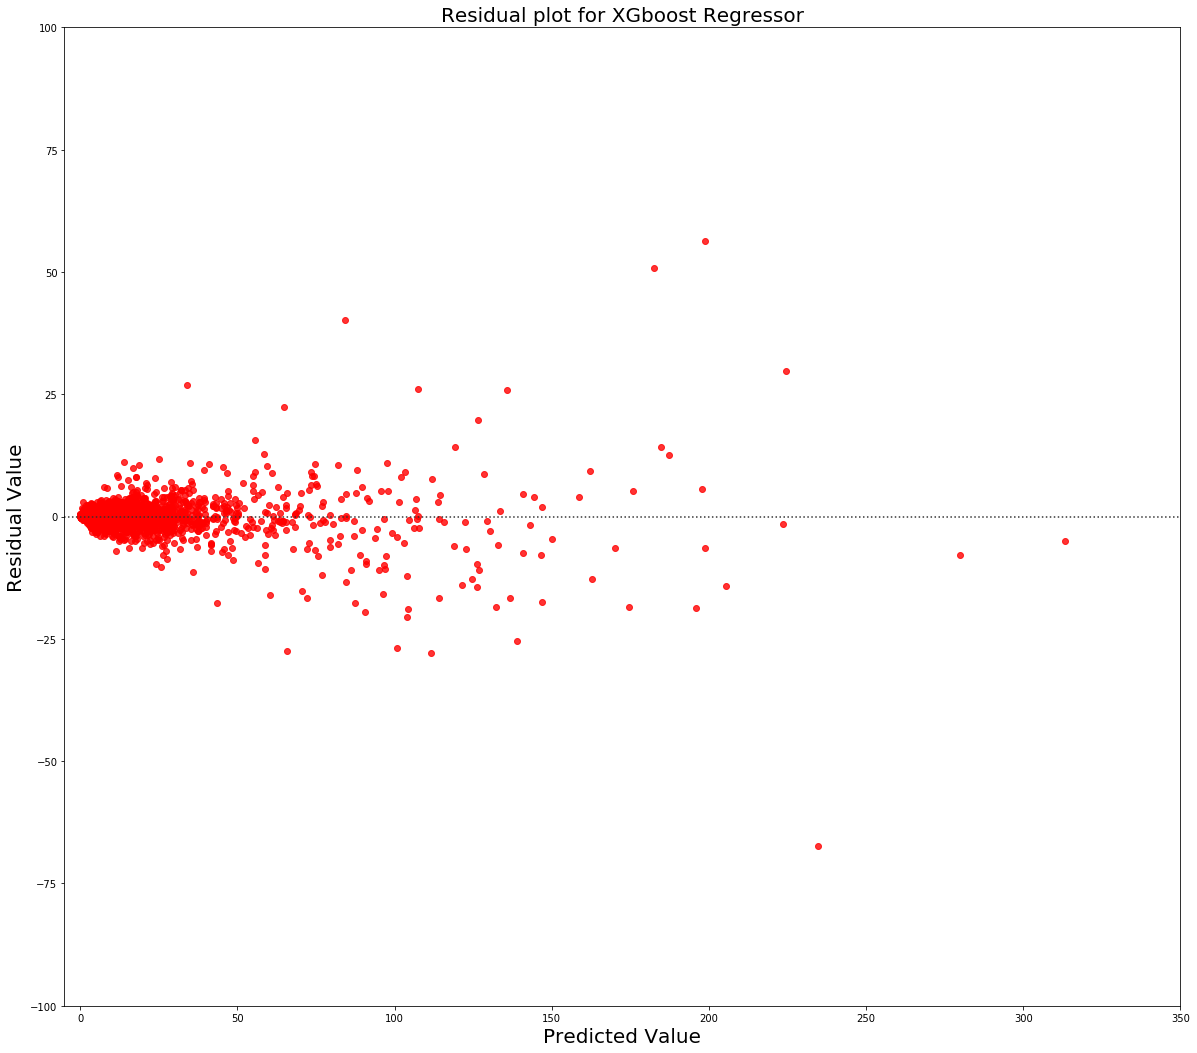

In [26]:
## XGboost Regressor
plt.figure(figsize=(20,18))
k = sns.residplot(x=y_pred2, y=(y_test-y_pred2),robust=True, color='red')#, hue=y_pred1, palette='plasma_r')
plt.title("Residual plot for XGboost Regressor", fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.xlim([-5, 350])
plt.ylim([-100, 100])
plt.ylabel('Residual Value', fontsize=20)
#plt.savefig('XGboost.png')
plt.show()

## RandomForest Regressor

In [34]:
Model_3 = RandomForestRegressor(n_estimators=100,n_jobs=-1, verbose=1, warm_start=True, oob_score=True )
MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score, y_pred3 = Model_(X_train, X_test, y_train, y_test, Model_3, PreProcess=1)
print("Random Forest Regressor Model: ")
print("Mean Absolute Error:\t","{:0.10f}".format(MeanAbsoluteError))
print("Mean Squared Error :\t","{:0.10f}".format(MeanSquaredError))
print("Median Absolute Error :\t","{:0.10f}".format(MedianAbsoluteError))
print("Explained Variance Score :\t","{:0.10f}".format(VarianceScore))
print("R2-Score :\t","{:0.10f}".format(R2Score))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


Random Forest Regressor Model: 
Mean Absolute Error:	 0.4040615222
Mean Squared Error :	 6.7417979790
Median Absolute Error :	 0.2009400000
Explained Variance Score :	 0.9332152304
R2-Score :	 0.9332148418


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


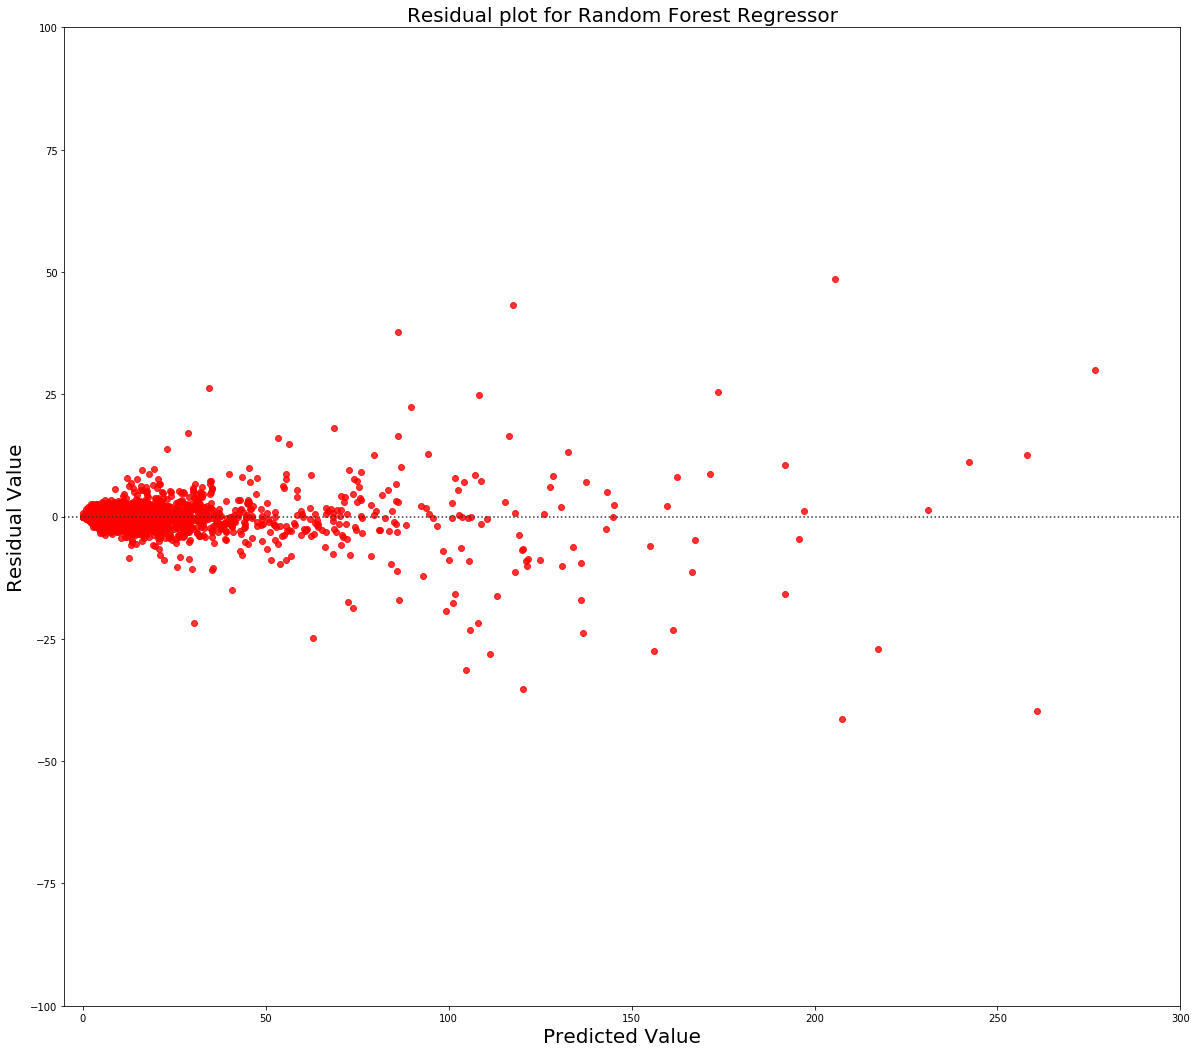

In [28]:
## Random Forest Regressor
plt.figure(figsize=(20,18))
k = sns.residplot(x=y_pred3, y=(y_test-y_pred3),robust=True,color='red')#, hue=y_pred1, palette='plasma_r')
plt.title("Residual plot for Random Forest Regressor", fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.ylabel('Residual Value', fontsize=20)
plt.xlim([-5, 300])
plt.ylim([-100, 100])
#plt.savefig('RandomForest.png')
plt.show()

## Adaboost Regressor

In [37]:
Model_4 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30, max_features="auto"), n_estimators=100, loss='exponential', learning_rate=0.5)
MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score,y_pred4 = Model_(X_train, X_test, y_train, y_test, Model_4, PreProcess=1)
print("Adaboost Regressor Model: ")
print("Mean Absolute Error:\t","{:0.10f}".format(MeanAbsoluteError))
print("Mean Squared Error :\t","{:0.10f}".format(MeanSquaredError))
print("Median Absolute Error :\t","{:0.10f}".format(MedianAbsoluteError))
print("Explained Variance Score :\t","{:0.10f}".format(VarianceScore))
print("R2-Score :\t","{:0.10f}".format(R2Score))

Adaboost Regressor Model: 
Mean Absolute Error:	 0.4111519233
Mean Squared Error :	 6.3205563183
Median Absolute Error :	 0.1960000000
Explained Variance Score :	 0.9373877402
R2-Score :	 0.9373877184


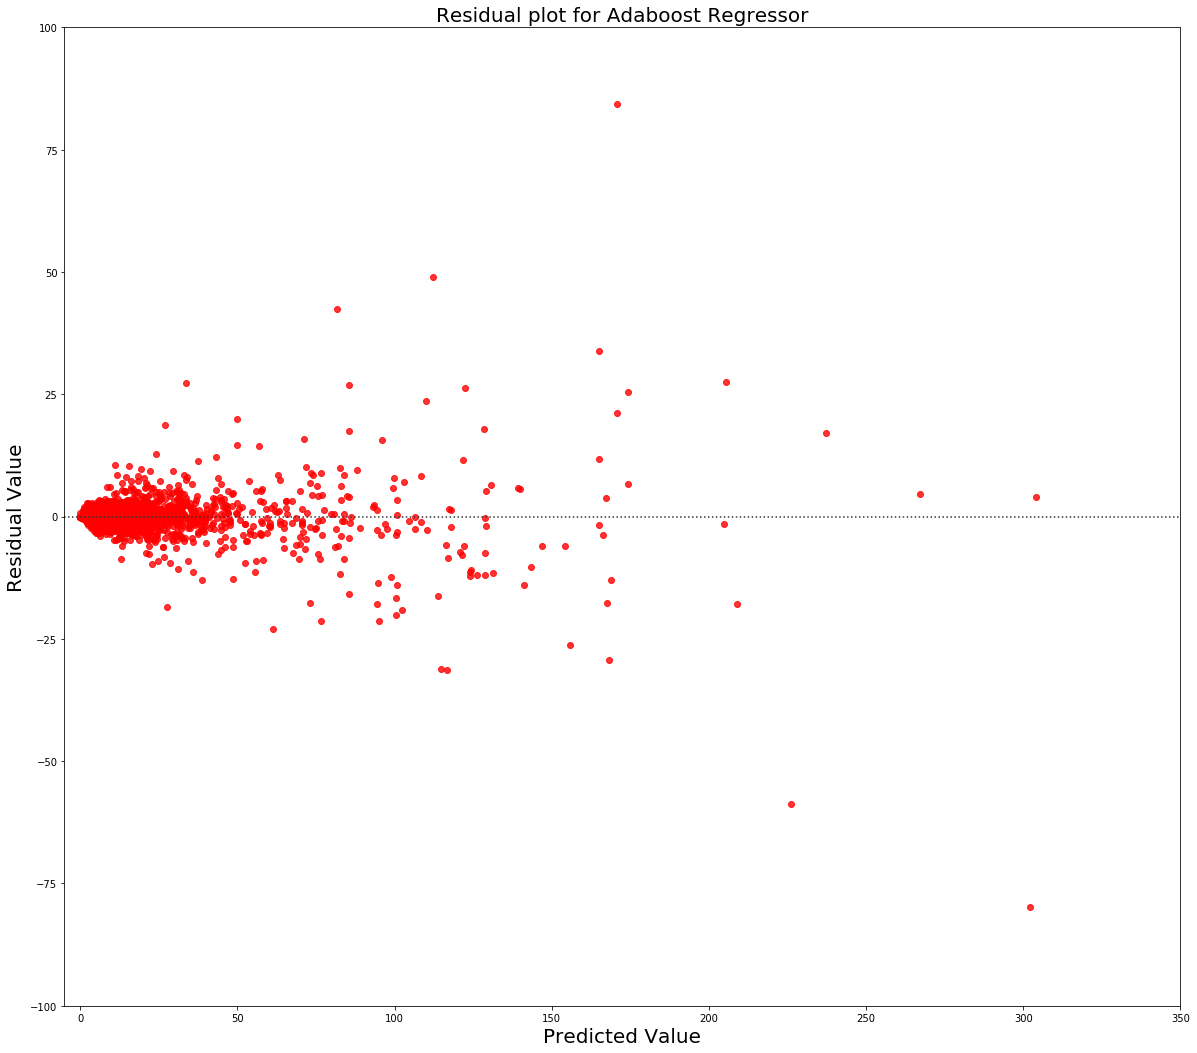

In [30]:
## Adaboost Regressor
plt.figure(figsize=(20,18))
k = sns.residplot(x=y_pred4, y=(y_test-y_pred4),robust=True,color='red')#, hue=y_pred1, palette='plasma_r')
plt.title("Residual plot for Adaboost Regressor", fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.ylabel('Residual Value', fontsize=20)
plt.xlim([-5, 350])
plt.ylim([-100, 100])
#plt.savefig('Adaboost.png')
plt.show()

## Neural Network

In [32]:
Model_5 = MLPRegressor(activation="tanh", solver="adam", verbose=True, max_iter=1000,warm_start=True)#beta_1=0.5,alpha=0.01
MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,VarianceScore,R2Score,y_pred5 = Model_(X_train, X_test, y_train, y_test, Model_5, PreProcess=1)
print("MLP Regressor Model: ")
print("Mean Absolute Error:\t","{:0.10f}".format(MeanAbsoluteError))
print("Mean Squared Error :\t","{:0.10f}".format(MeanSquaredError))
print("Median Absolute Error :\t","{:0.10f}".format(MedianAbsoluteError))
print("Explained Variance Score :\t","{:0.10f}".format(VarianceScore))
print("R2-Score :\t","{:0.10f}".format(R2Score))

Iteration 1, loss = 40.00642837
Iteration 2, loss = 28.47788140
Iteration 3, loss = 24.75946385
Iteration 4, loss = 23.29444191
Iteration 5, loss = 21.83476999
Iteration 6, loss = 20.31561516
Iteration 7, loss = 18.79359168
Iteration 8, loss = 17.35301070
Iteration 9, loss = 16.00131154
Iteration 10, loss = 14.77280529
Iteration 11, loss = 13.69815294
Iteration 12, loss = 12.76651233
Iteration 13, loss = 11.94192828
Iteration 14, loss = 11.21310974
Iteration 15, loss = 10.56034343
Iteration 16, loss = 10.01476302
Iteration 17, loss = 9.53991215
Iteration 18, loss = 9.10780017
Iteration 19, loss = 8.72099370
Iteration 20, loss = 8.38033474
Iteration 21, loss = 8.08488066
Iteration 22, loss = 7.80741488
Iteration 23, loss = 7.55453909
Iteration 24, loss = 7.32868936
Iteration 25, loss = 7.12711925
Iteration 26, loss = 6.93662734
Iteration 27, loss = 6.75640832
Iteration 28, loss = 6.59225639
Iteration 29, loss = 6.44645342
Iteration 30, loss = 6.30616798
Iteration 31, loss = 6.16353529
I

Iteration 253, loss = 1.07443908
Iteration 254, loss = 1.06925277
Iteration 255, loss = 1.05436459
Iteration 256, loss = 1.06252554
Iteration 257, loss = 1.04745073
Iteration 258, loss = 1.03879321
Iteration 259, loss = 1.03580311
Iteration 260, loss = 1.03645263
Iteration 261, loss = 1.02521564
Iteration 262, loss = 1.01579593
Iteration 263, loss = 1.01410304
Iteration 264, loss = 0.99976407
Iteration 265, loss = 0.99397694
Iteration 266, loss = 0.99335184
Iteration 267, loss = 0.99306878
Iteration 268, loss = 0.99032236
Iteration 269, loss = 0.97916918
Iteration 270, loss = 0.98880994
Iteration 271, loss = 0.97716288
Iteration 272, loss = 0.96940226
Iteration 273, loss = 0.96172787
Iteration 274, loss = 0.96382110
Iteration 275, loss = 0.95328934
Iteration 276, loss = 0.94780392
Iteration 277, loss = 0.94854094
Iteration 278, loss = 0.94795556
Iteration 279, loss = 0.92999633
Iteration 280, loss = 0.92736665
Iteration 281, loss = 0.93183469
Iteration 282, loss = 0.92654025
Iteration 

Iteration 502, loss = 0.47090957
Iteration 503, loss = 0.47551619
Iteration 504, loss = 0.47440943
Iteration 505, loss = 0.47338324
Iteration 506, loss = 0.47674872
Iteration 507, loss = 0.47136143
Iteration 508, loss = 0.47191365
Iteration 509, loss = 0.47490905
Iteration 510, loss = 0.47111663
Iteration 511, loss = 0.47077036
Iteration 512, loss = 0.47606264
Iteration 513, loss = 0.46614066
Iteration 514, loss = 0.47082598
Iteration 515, loss = 0.46808467
Iteration 516, loss = 0.46762267
Iteration 517, loss = 0.46790630
Iteration 518, loss = 0.47211097
Iteration 519, loss = 0.46346976
Iteration 520, loss = 0.46376750
Iteration 521, loss = 0.46460033
Iteration 522, loss = 0.46166068
Iteration 523, loss = 0.46542569
Iteration 524, loss = 0.46345404
Iteration 525, loss = 0.46715329
Iteration 526, loss = 0.46096561
Iteration 527, loss = 0.46199563
Iteration 528, loss = 0.46335368
Iteration 529, loss = 0.46573849
Iteration 530, loss = 0.46132511
Iteration 531, loss = 0.46435582
Iteration 

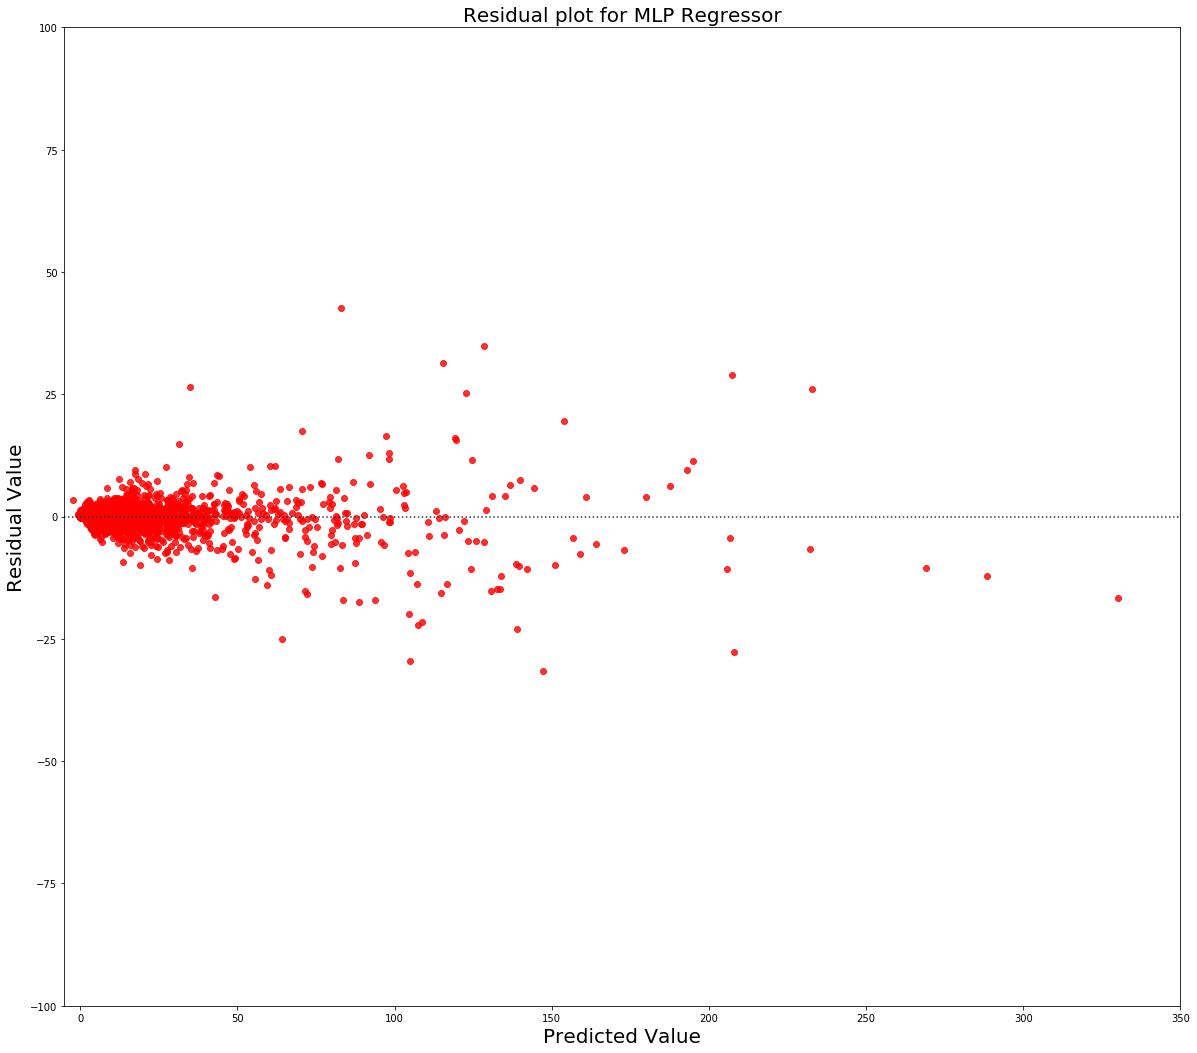

In [34]:
## Neural Network Regressor
plt.figure(figsize=(20,18))
k = sns.residplot(x=y_pred5, y=(y_test-y_pred5),robust=True, color='red')#, hue=y_pred1, palette='plasma_r')
plt.title("Residual plot for MLP Regressor", fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.ylabel('Residual Value', fontsize=20)
plt.xlim([-5, 350])
plt.ylim([-100, 100])
plt.savefig('MLP.png')
plt.show()